In [1]:
import os.path as osp
import pickle

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fname = osp.join('..', 'data', 'task6.pkl')
with open(fname, 'rb') as fin:
    data = pickle.load(fin)
data.keys()

dict_keys(['g', 'dijkstra', 'bf', 'grid', 'astar'])

# Dijkstra vs Bellman-Ford

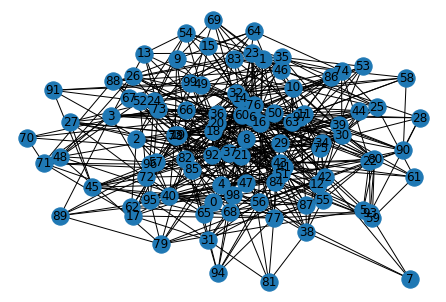

In [8]:
pos = nx.spring_layout(data['g'], iterations=10000)
nx.draw(data['g'], pos, with_labels=True)

In [3]:
df_dijkstra = pd.DataFrame(data['dijkstra'])
df_bf = pd.DataFrame(data['bf'])
df_dijkstra['vertices'] = df_dijkstra['vertices'].map(str)
df_bf['vertices'] = df_bf['vertices'].map(str)
df = pd.merge(df_dijkstra, df_bf, left_on='vertices', right_on='vertices', suffixes=('_dijkstra', '_bf'))
df

,vertices,path_dijkstra,path_len_dijkstra,time_dijkstra,path_bf,path_len_bf,time_bf
0,"[0, 1]","[0, 21, 68, 25, 92, 1]",6,0.005036,"[0, 21, 68, 25, 92, 1]",6,0.030442
1,"[0, 2]","[0, 2]",2,0.000258,"[0, 2]",2,0.030349
2,"[0, 3]","[0, 21, 62, 89, 3]",5,0.007259,"[0, 21, 62, 89, 3]",5,0.022674
3,"[0, 4]","[0, 87, 32, 4]",4,0.001877,"[0, 87, 32, 4]",4,0.021979
4,"[0, 5]","[0, 87, 32, 5]",4,0.001494,"[0, 87, 32, 5]",4,0.021887
...,...,...,...,...,...,...,...
4945,"[96, 98]","[96, 40, 82, 98]",4,0.000989,"[96, 40, 82, 98]",4,0.026727
4946,"[96, 99]","[96, 40, 27, 75, 99]",5,0.004213,"[96, 40, 27, 75, 99]",5,0.027553
4947,"[97, 98]","[97, 90, 36, 51, 40, 82, 98]",7,0.003442,"[97, 90, 36, 51, 40, 82, 98]",7,0.023750
4948,"[97, 99]","[97, 75, 99]",3,0.001034,"[97, 75, 99]",3,0.023367


In [4]:
non_equal = df[df['path_len_dijkstra'] != df['path_len_bf']]
non_equal

,vertices,path_dijkstra,path_len_dijkstra,time_dijkstra,path_bf,path_len_bf,time_bf
4457,"[68, 72]","[68, 21, 27, 45, 72]",5,0.005062,"[68, 52, 72]",3,0.021056


In [5]:
dijkstra_weight = 0

for v1, v2 in zip(non_equal['path_dijkstra'].values[0], non_equal['path_dijkstra'].values[0][1:]):
    w = data['g'].edges()[v1, v2]['weight']
    print(w, end=' ')
    dijkstra_weight += w
    
dijkstra_weight

67 84 54 258 

463

In [6]:
bf_weight = 0

for v1, v2 in zip(non_equal['path_bf'].values[0], non_equal['path_bf'].values[0][1:]):
    w = data['g'].edges()[v1, v2]['weight']
    print(w, end=' ')
    bf_weight += w
    
bf_weight

426 37 

463

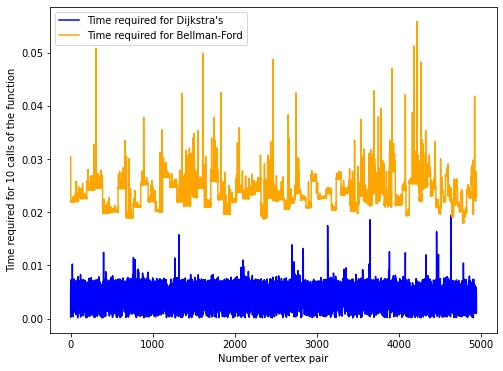

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(df.shape[0]), df['time_dijkstra'], color='blue', label='Time required for Dijkstra\'s')
plt.plot(np.arange(df.shape[0]), df['time_bf'], color='orange', label='Time required for Bellman-Ford')
plt.xlabel('Number of vertex pair')
plt.ylabel('Time required for 10 calls of the function')
plt.legend();

# A* algorithm

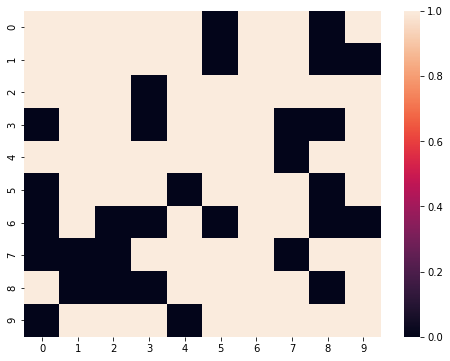

In [8]:
matrix = np.zeros((10, 10), dtype=int)
for v in list(data['grid'].nodes()):
    matrix[v] = 1

plt.figure(figsize=(8, 6))
sns.heatmap(matrix);

In [9]:
df_a = pd.DataFrame(data['astar'])

In [12]:
df_a.sort_values('path_len', ascending=False).head()

,vertices,path,path_len,time
53,"[(0, 0), (7, 8)]","[(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1...",22,0.003565
569,"[(1, 0), (7, 8)]","[(1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2...",21,0.003568
54,"[(0, 0), (7, 9)]","[(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1...",21,0.003511
121,"[(0, 1), (7, 8)]","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2...",21,0.003581
968,"[(2, 0), (7, 8)]","[(2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3...",20,0.003599


In [13]:
df_a.sort_values('time', ascending=False).head()

,vertices,path,path_len,time
203,"[(0, 2), (9, 9)]","[(0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3...",17,0.006105
2039,"[(5, 5), (5, 9)]","[(5, 5), (4, 5), (3, 5), (2, 5), (2, 6), (2, 7...",11,0.005628
1787,"[(4, 4), (4, 8)]","[(4, 4), (3, 4), (2, 4), (2, 5), (2, 6), (2, 7...",11,0.005297
684,"[(1, 2), (7, 3)]","[(1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4...",14,0.005281
2090,"[(5, 7), (5, 9)]","[(5, 7), (5, 6), (4, 6), (3, 6), (2, 6), (2, 7...",11,0.005216
